In [34]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

client_id ='bd99c730b4ee436994cf7a9541abbd34'
client_secret ='493233d6a05e4975add89447cd348f78'

In [35]:
# Este código devuelve las playlists de silvia2184
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

playlists_dictionary = sp.user_playlists("silvia2184")

In [36]:
ids_playlists_silvia = []
for playlist in playlists_dictionary['items']:
    playlist_id = playlist['id']
    ids_playlists_silvia.append(playlist_id)

In [37]:
# Ya hemos conseguido el género y la fecha en la que se añadió las canciones de una playlist, hay que hacerlo para todas las playlists de un usuario y lo añadimos a un dataframe
artists_names_silvia = []
artists_ids_silvia = []
added_date_silvia = []
    
for j in ids_playlists_silvia:
    # Obtener las pistas de la playlist
    tracks = sp.playlist_tracks(j)
    for i in tracks['items']:
        track = i['track']
        track_artists = track['artists']
        added_at = i['added_at']  # Fecha en la que se añadió la canción a la playlist
        for j in track_artists:
            artist_name = j['name']
            artist_id = j['id']
            artists_names_silvia.append(artist_name)
            artists_ids_silvia.append(artist_id)
            added_date_silvia.append(added_at)

In [ ]:
generos_silvia = []
for artist_id in artists_ids_silvia:
    artist_info = sp.artist(artist_id)
    artist_genres = artist_info['genres']
    
    # Comprueba si artist_genres está vacío y agrega 'NA' si es necesario
    if not artist_genres:
        artist_genres.append('NA')
    generos_silvia.append(artist_genres)

In [12]:
datos = pd.DataFrame({'Nombres':artists_names_silvia,'Id':artists_ids_silvia, 'Géneros':generos_silvia, 'Fecha en la que se añadió':added_date_silvia})

,Nombres,Id,Géneros,Fecha en la que se añadió
0,Calle 13,0yNSzH5nZmHzeE2xn6Xshb,"[latin afrobeat, latin alternative, latin hip ...",2019-12-03T18:16:01Z
1,Latin Soul Syndicate,7hxIk7Xc5inSXA4uXHUSps,[NA],2019-12-03T18:16:21Z
2,Liam Payne,5pUo3fmmHT8bhCyHE52hA6,[pop],2019-12-03T18:17:58Z
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,"[reggaeton, reggaeton colombiano, trap latino,...",2019-12-03T18:17:58Z
4,Romeo Santos,5lwmRuXgjX8xIwlnauTZIP,"[bachata, latin hip hop, latin pop, trap latin...",2019-12-03T18:19:21Z
...,...,...,...,...
1866,NEIKED,5H6xmHXjsq98NLbEjuE29f,[scandipop],2017-04-10T09:04:34Z
1867,Dyo,4H1PNuHElBLVok0lnYMrRb,[alte],2017-04-10T09:04:34Z
1868,Dimitri Vegas & Like Mike,73jBynjsVtofjRpdpRAJGk,"[belgian dance, belgian edm, big room, dutch h...",2017-04-10T09:05:34Z
1869,Diplo,5fMUXHkw8R8eOP2RNVYEZX,"[dance pop, edm, electro house, moombahton, po...",2017-04-10T09:05:34Z


In [13]:
# Convertir la columna 'fecha' al tipo datetime
datos['Fecha en la que se añadió'] = pd.to_datetime(datos['Fecha en la que se añadió'])

# Ordenar el DataFrame por la columna 'fecha'
datos = datos.sort_values(by='Fecha en la que se añadió')

In [14]:
# Guardar el DataFrame Limpio
ruta_limpia = 'datos_limpios.csv'
datos.to_csv(ruta_limpia, index=False)
print(f"\nDatos limpios guardados en {ruta_limpia}")


Datos limpios guardados en datos_limpios.csv


In [15]:
# Función para asignar estación a cada fecha
def obtener_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Crear una nueva columna 'Estación' en el DataFrame
datos['Estación'] = datos['Fecha en la que se añadió'].apply(obtener_estacion)

In [16]:
datos.head()

,Nombres,Id,Géneros,Fecha en la que se añadió,Estación
1738,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,"[pop, singer-songwriter pop, uk pop]",2017-01-06 20:34:08+00:00,Invierno
1739,James Blunt,7KMqksf0UMdyA0UCf4R3ux,[neo mellow],2017-01-06 20:34:35+00:00,Invierno
1740,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,"[pop, singer-songwriter pop, uk pop]",2017-01-06 20:35:57+00:00,Invierno
1741,Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,"[dutch edm, edm, pop, pop dance, progressive h...",2017-01-06 21:13:00+00:00,Invierno
1742,Bebe Rexha,64M6ah0SkkRsnPGtGiRAbb,"[dance pop, pop]",2017-01-06 21:13:00+00:00,Invierno


In [29]:
# Diccionario con categorías generales
categorias_generales = {
    'Música clásica': ['classical', 'baroque', 'romantic','classic', 'oldies', 'classic pop','orchestra', 'symphony', 'philharmonic','opera', 'lyrical', 'tenor', 'soprano'],
    'Jazz, Soul & Blues': ['jazz', 'smooth jazz', 'bebop', 'free jazz','blues', 'country blues', 'electric blues','soul', 'neo soul', 'motown'],
    'Pop': ['pop', 'colombian pop', 'latin alternative','dance pop', 'latin pop', 'pop','singer-songwriter pop', 'uk pop','french pop','latin viral pop','danish pop', 'scandipop','spanish pop', 'spanish pop rock'],
    'Rock & Indie': ['rock', 'classic rock', 'punk rock', 'alternative rock','neo mellow','modern rock','spanish rock','puerto rican indie','indie'],
    'Country': ['country', 'modern country', 'classic country'],
    'Reggae': ['reggae', 'roots reggae', 'dancehall','funana','reggae fusion','bolero', 'bolero mexicano', 'ranchera','classic italian pop', 'musica lombarda', 'pop romantico','grime', 'instrumental grime'],
    'Reggateon': ['reggaeton','reggaeton colombiano', 'trap latino', 'urbano latino','cubaton', 'reparto','urbano espanol'],
    'Hip hop': ['hip hop', 'rap', 'trap', 'boom bap','rap romantico', 'spanish hip hop','r&b', 'contemporary r&b','drill', 'uk drill'],
    'EDM & Disco': ['disco', 'nu disco','edm', 'electronic', 'house', 'techno', 'trance', 'dutch edm', 'pop dance','alternative dance', 'electropop', 'indietronica', 'neo-synthpop', 'shimmer pop', 'swedish electropop', 'swedish indie pop', 'swedish synthpop','dutch house', 'edm', 'electro house', 'pop dance', 'progressive electro house', 'progressive house'],
    'Flamenco': ['flamenco', 'nuevo flamenco','sevillanas']
}

# Función para asignar la categoría general a una canción
def asignar_categoria(generos):
    # Recorrer cada género de la sublista y asignar la categoría más general que contenga ese género
    for categoria, subgeneros in categorias_generales.items():
        if any(genero in subgeneros for genero in generos):  # Si alguno de los géneros pertenece a la categoría
            return categoria
    return 'Otros'  # Si no se encuentra una categoría, asignar 'Otros'

# Aplicar la función a la columna 'Géneros'
datos['Género General'] = datos['Géneros'].apply(asignar_categoria)

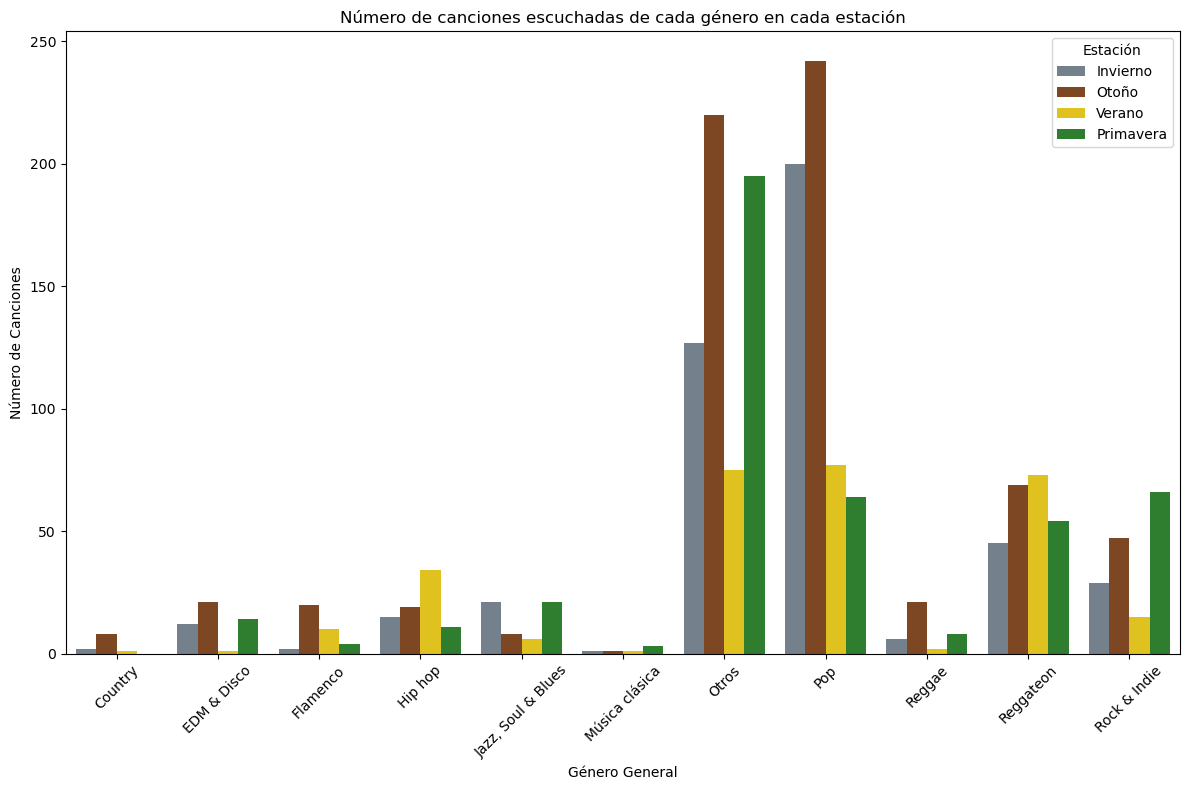

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data to count the number of songs by 'Género General' and 'Estación'
genre_season_count = datos.groupby(['Género General', 'Estación']).size().reset_index(name='Count')

# Ajuste de colores personalizados para cada estación
estacion_colors = {
    'Otoño': '#8B4513',         # Marrón oscuro
    'Invierno': '#708090',      # Azul gris
    'Verano': '#FFD700',        # Amarillo
    'Primavera': '#228B22'      # Verde
}

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_season_count, x='Género General', y='Count', hue='Estación', palette=estacion_colors)

# Adding titles and labels
plt.title('Número de canciones escuchadas de cada género en cada estación')
plt.xlabel('Género General')
plt.ylabel('Número de Canciones')
plt.legend(title='Estación')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


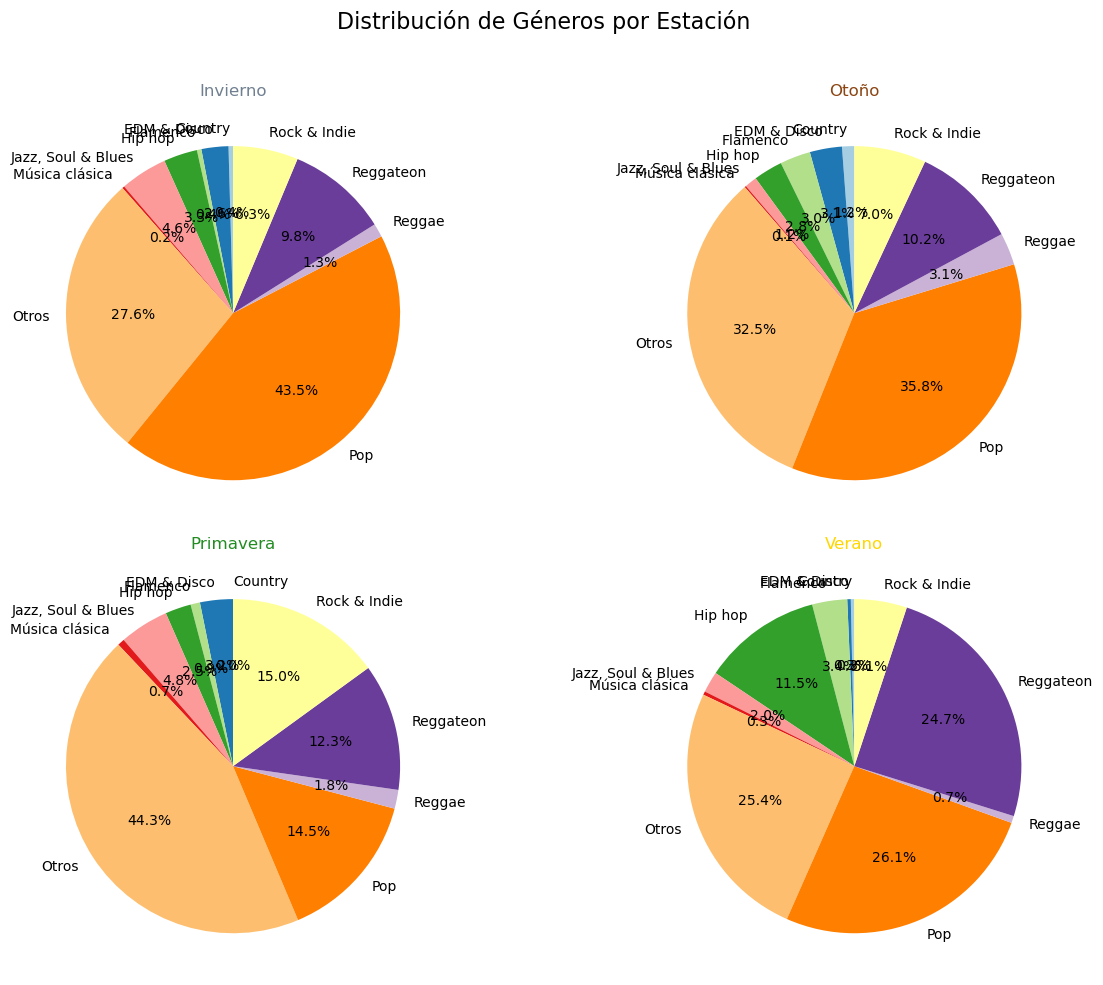

In [31]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'Estación' y 'Género General' y contar la cantidad de canciones en cada combinación
generos_estacion = datos.groupby(['Estación', 'Género General']).size().unstack(fill_value=0)

# Definir los colores personalizados para cada estación
colores_estaciones = {
    'Invierno': '#708090',  # azul gris
    'Primavera': '#228B22',  # verde
    'Verano': '#FFD700',  # amarillo
    'Otoño': '#8B4513'  # marrón oscuro
}

# Crear un gráfico de pastel para cada estación
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, estacion in enumerate(generos_estacion.index):
    # Extraer los datos de la estación actual
    generos = generos_estacion.loc[estacion]
    
    # Generar el gráfico de pastel
    axes[i].pie(
        generos, 
        labels=generos.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'{estacion}', color=colores_estaciones[estacion])

plt.suptitle("Distribución de Géneros por Estación", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

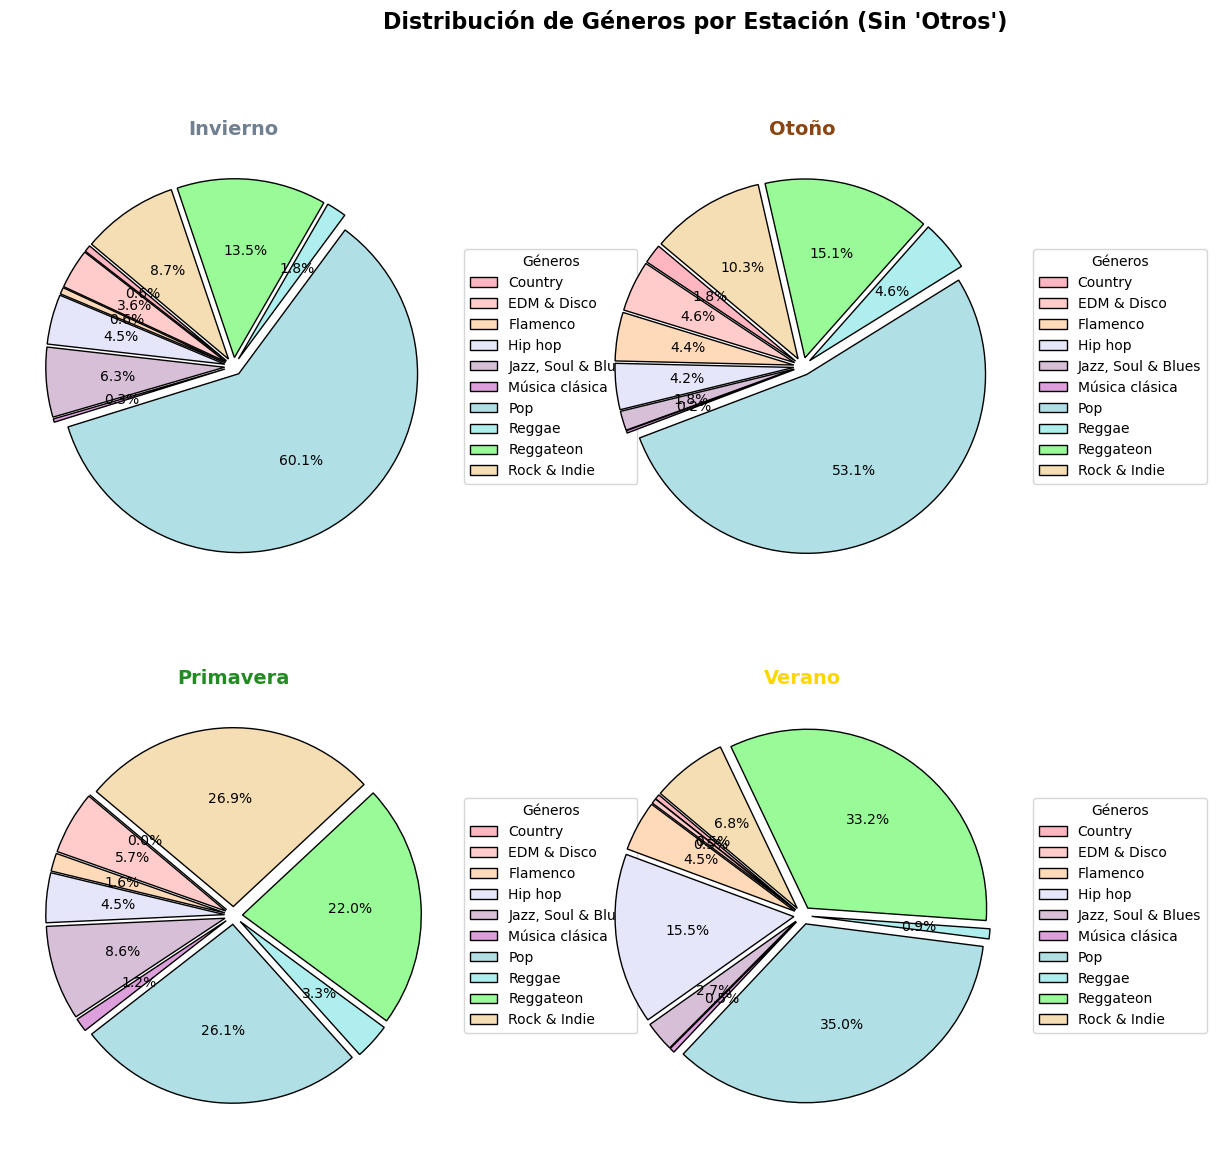

In [33]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'Estación' y 'Género General' y contar la cantidad de canciones en cada combinación
generos_estacion = datos.groupby(['Estación', 'Género General']).size().unstack(fill_value=0)

# Definir los colores personalizados para cada estación
colores_estaciones = {
    'Invierno': '#708090',  # azul gris
    'Primavera': '#228B22',  # verde
    'Verano': '#FFD700',  # amarillo
    'Otoño': '#8B4513'  # marrón oscuro
}
# Definir colores específicos para los géneros
colores_generos = [
    '#FFB6C1', '#FFCCCB', '#FFDAB9', '#E6E6FA', '#D8BFD8', '#DDA0DD', 
    '#B0E0E6', '#AFEEEE', '#98FB98', '#F5DEB3', '#FFD700', '#FFE4E1', 
    '#FAFAD2', '#E0FFFF', '#ADD8E6', '#E6E6FA'
]
# Crear un gráfico de pastel para cada estación con efecto 3D y leyenda externa
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, estacion in enumerate(generos_estacion.index):
    # Extraer los datos de la estación actual y eliminar el género 'Otros'
    generos = generos_estacion.loc[estacion]
    generos = generos[generos.index != 'Otros']
    
    # Configuración para el efecto 3D
    explode = [0.05] * len(generos)  # Separar un poco cada porción
    
    # Generar el gráfico de pastel
    wedges, texts, autotexts = axes[i].pie(
        generos, 
        explode=explode, 
        startangle=140, 
        colors=colores_generos[:len(generos)],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        autopct='%1.1f%%'
    )
    
    # Añadir el título con el color de la estación
    axes[i].set_title(f'{estacion}', color=colores_estaciones[estacion], fontsize=14, fontweight='bold')

    # Añadir una leyenda externa
    axes[i].legend(
        wedges, 
        generos.index, 
        title="Géneros", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

# Título principal
plt.suptitle("Distribución de Géneros por Estación (Sin 'Otros')", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.85, 0.96])  # Ajustar layout para espacio de la leyenda
plt.show()